## NEP_Phon

<Figure size 3600x600 with 0 Axes>

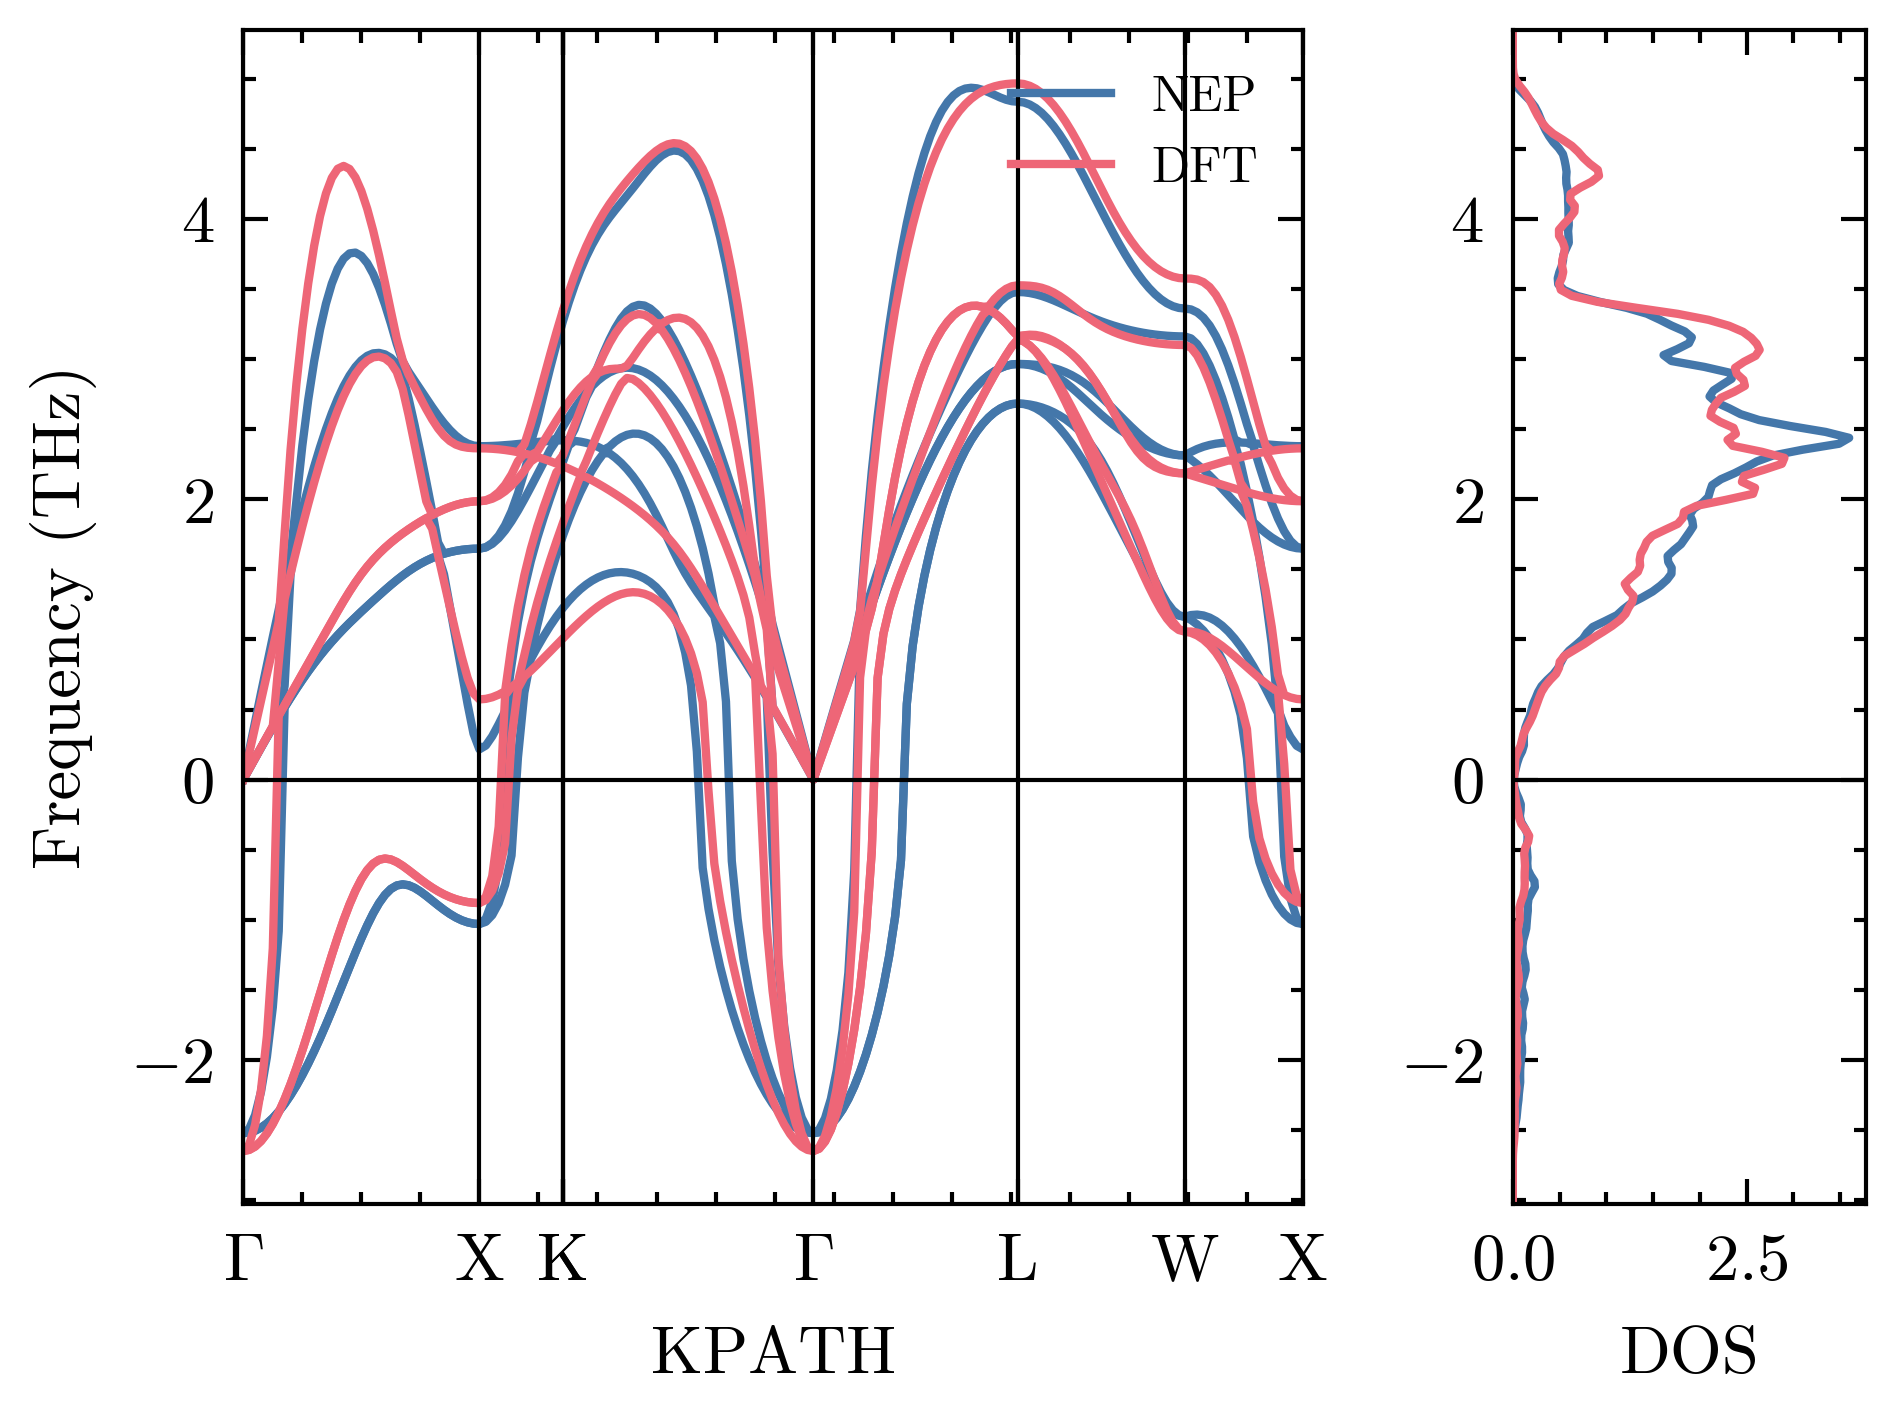

In [1]:
from ase.io import read
from phon import calculate_primitive_matrix, calculate_force_constants_by_nep, calculate_force_constants_by_dft, get_manual_kpoints, get_kpoints, plot_phonon_dispersion, plot_phonon_dos, plot_phonon_dispersion_and_dos
import numpy as np

def main():
    """
    主函数
    """
    unit_cell = read("./POSCAR")
    primitive_matrix = [[0.000000000000000,  0.500000000000000,  0.500000000000000],
                        [0.500000000000000,  0.000000000000000,  0.500000000000000],
                        [0.500000000000000,  0.500000000000000,  0.000000000000000]]

    supercell_matrix = [3, 3, 3]
#     high_symmetry_points = [
#         {'label': 'L', 'coords': [0.5, 0.5, 0.5]},
#         {'label': 'GAMMA', 'coords': [0.0, 0.0, 0.0]},
#         {'label': 'X', 'coords': [0.5, 0.0, 0.5]},
#     ]
    
    phonons = dict()
    phonons["NEP"] = calculate_force_constants_by_nep(unit_cell, primitive_matrix, supercell_matrix)
    phonons["DFT"] = calculate_force_constants_by_dft(unit_cell, primitive_matrix, supercell_matrix)

#     kpoints_rel, kpoints_lincoord, labels = get_manual_kpoints(unit_cell, high_symmetry_points)
    kpoints_rel, kpoints_lincoord, labels = get_kpoints(unit_cell)
    
    plot_phonon_dispersion_and_dos(kpoints_rel, kpoints_lincoord, labels, phonons, "phon.png")
#     plot_phonon_dispersion(kpoints_rel, kpoints_lincoord, labels, phonons, "phon.png")    
        
if __name__ == '__main__':
    main()
    